# importing modules and information about dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
#printing the dataframe. The dataset is about honey production accross various states in united states of america.
df=pd.read_csv('US_honey_dataset_updated.csv')
#printing 7 random rows of the dataset
df.sample(7)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
499,499,NorthDakota,350000,74,25900000,7770000,90.00,23310000,2006
394,394,California,390000,45,17550000,5792000,101.00,17726000,2004
1039,1039,Colorado,30000,41,455000,455000,2.39,2940000,2020
182,182,Idaho,120000,48,5760000,3110000,59.00,3398000,1999
441,441,Indiana,8000,64,512000,189000,119.00,609000,2005
422,422,Tennessee,6000,54,324000,91000,172.00,557000,2004
902,902,Oregon,74000,35,622000,622000,191.00,4947000,2016


# data cleaning

In [ ]:
#describing the dataset
df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


In [ ]:
#checking for null values in each column
df[0:50].isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [ ]:
#displaying number of rows and columns
print(df.shape)
#displaying the count of each row under the column 'colonies_number'(50 rows)
print(df['colonies_number'][0:50].value_counts)

(1115, 9)
<bound method IndexOpsMixin.value_counts of 0      16000
1      52000
2      50000
3     420000
4      45000
5     230000
6      70000
7       8000
8     125000
9      11000
10     12000
11     50000
12     17000
13      3000
14     33000
15     11000
16      7000
17     97000
18    165000
19     16000
20     23000
21    106000
22     60000
23      9000
24      8000
25     19000
26     70000
27     12000
28    220000
29     25000
30      5000
31     52000
32     25000
33      9000
34    240000
35      4000
36     84000
37     32000
38      5000
39      9000
40     60000
41     13000
42     73000
43     38000
44     16000
45     32000
46     40000
47    390000
48     30000
49    240000
Name: colonies_number, dtype: int64>


In [ ]:
changed_df=df[df['state']=='Georgia']# taking only the state Georgia into consideration
print(changed_df.shape)# shape of dataset
print(changed_df.isnull().sum())# check for null entries
ch=changed_df.dropna()#dropping null entries 
print(ch.shape)#shape of the dataset after cleaning
print(ch.isnull().sum())#checking for null values after cleaning
ch.sample(2)#printing 2 entries having satate Georgia

(27, 9)
Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64
(27, 9)
Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64


,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
560,560,Georgia,55000,71,3905000,312000,149.0,5818000,2008
397,397,Georgia,63000,49,3087000,648000,118.0,3643000,2004


# printing correlation values

In [ ]:
#printing correlation values of each row and column
ch.corr()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
Unnamed: 0,1.000000,0.604769,-0.661093,-0.860844,-0.016629,0.207303,0.867402,0.999840
colonies_number,0.604769,1.000000,-0.670666,-0.471204,0.146522,-0.148687,0.756370,0.616657
yield_per_colony,-0.661093,-0.670666,1.000000,0.752220,0.102383,0.019883,-0.472704,-0.666121
production,-0.860844,-0.471204,0.752220,1.000000,0.220273,-0.294486,-0.699798,-0.861792
stocks,-0.016629,0.146522,0.102383,0.220273,1.000000,0.117402,0.111757,-0.018687
average_price,0.207303,-0.148687,0.019883,-0.294486,0.117402,1.000000,0.271241,0.200772
value_of_production,0.867402,0.756370,-0.472704,-0.699798,0.111757,0.271241,1.000000,0.872114
year,0.999840,0.616657,-0.666121,-0.861792,-0.018687,0.200772,0.872114,1.000000


# linear regression

In [ ]:
#from such a vast dataset, we chose only the production in state georgia.
ch=ch[['average_price','yield_per_colony']]# consider only these two columns.
#printing 7 random elements in dataset under these columns.
ch.sample(7)

,average_price,yield_per_colony
841,243.00,40
94,79.00,46
1081,2.73,34
437,84.00,49
266,70.00,57
801,219.00,62
6,69.00,62


In [ ]:
#I have chosen these two columns to show the relationship between them.This is just an assumption.
#The two columns are taken as an array using numpy module.
#The number of rows and columns is printed as output(in accordance to georgia).
X=np.array(ch[['average_price']])
Y=np.array(ch[['yield_per_colony']])
print(X.shape)
print(Y.shape)

(27, 1)
(27, 1)


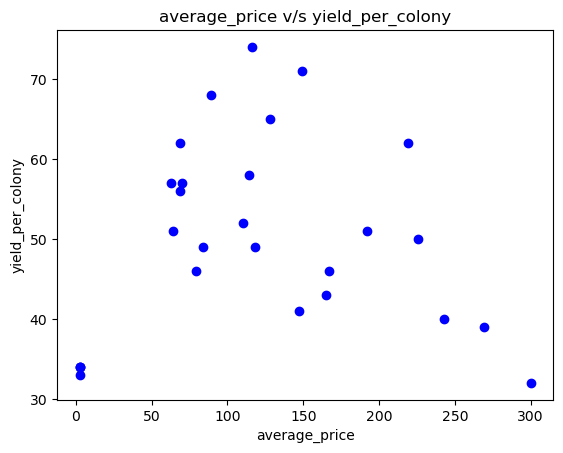

In [ ]:
#scatter plot between X and Y.
plt.scatter(X,Y,color='blue')
plt.title('average_price v/s yield_per_colony')
plt.xlabel('average_price')
plt.ylabel('yield_per_colony')
plt.show()

In [ ]:
#once we get a scatter plot, we decide to perform linear regression on the variables.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=15)# splitting into train and test dataset
regressor = LinearRegression()#creating regressior
regressor.fit(X_train,Y_train)#fitting the dataset into the model

LinearRegression()

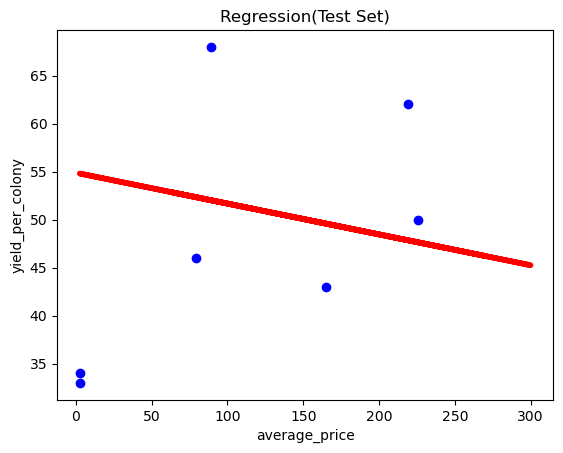

In [ ]:
#Here we split our ‘X’ and ‘Y’ dataset into ‘X_train’, ‘X_test’ and ‘Y_train’, ‘Y_test’. Here we take 25% data as test dataset and remaining as train dataset. We take the random_state value as 15 for our better prediction. We create regressor. And we fit the X_train and Y_train into the regressor model.
plt.scatter(X_test,Y_test,color='blue') # graph plotted between X_test and Y_test
plt.plot(X_train,regressor.predict(X_train),color='red',linewidth=4) #regresssior line showing
plt.title('Regression(Test Set)')
plt.xlabel('average_price')
plt.ylabel('yield_per_colony')
plt.show()

In [ ]:
#Here we plot the final X_train vs Y_train scatterplot graph with a best-fit regression line. Here we can clearly understand the regression line.
Y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(Y_test,Y_pred)) 
print('Mean squared Error :',mean_squared_error(Y_test,Y_pred)) 

R2 score: -0.38
Mean squared Error : 207.41265149435063


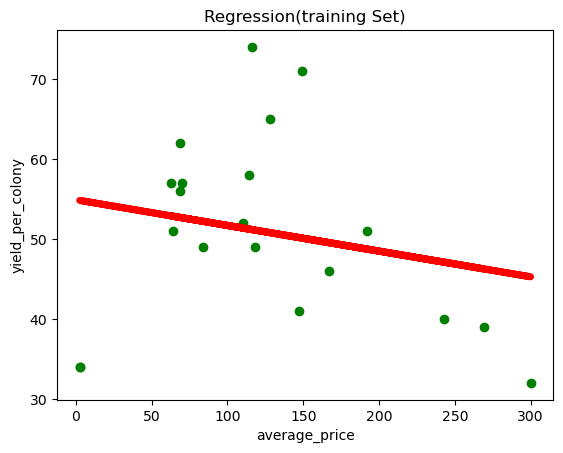

In [ ]:
#Here we plot a scatter plot graph between X_test and Y_test datasets and we draw a regression line.
plt.scatter(X_train,Y_train,color="green")  # graph plotted between X_test and Y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=5)  # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('average_price')
plt.ylabel('yield_per_colony')
plt.show()

In [ ]:
#Here we create a function with the help of our trained regressor model. And we get our desired output.
def total_honey_price(cost):
    ans=regressor.predict(np.array(cost).reshape(-2,2))
    return (result[0,0])
honey_cost = df['average_price'].mean()
print('The total cost of honey in The USA is : $',honey_cost)

The total cost of honey in The USA is : $ 140.62307623318372


In [ ]:
#Hence, the conclusion that can be made or the inference that can be drawn from the linear regression is that as the average price of honey  in each state increases, the yield of honey per colony of bees decreases.
#The total cost of honey combining all the states in The USA is 140.62 dollars